In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from common import rank_order, get_all_data

players, ranked_matches, ranked_player_match_data, swiftplay_matches, swiftplay_player_match_data = get_all_data()

In [122]:
print(players.columns)
print(ranked_matches.columns)
print(ranked_player_match_data.columns)
print(swiftplay_matches.columns)
print(swiftplay_player_match_data.columns)

Index(['puuid', 'summonerLevel', 'tier', 'rank', 'swiftplay_kills',
       'swiftplay_deaths', 'swiftplay_assists', 'swiftplay_kd', 'swiftplay_ad',
       'swiftplay_kda', 'swiftplay_kad', 'swiftplay_win_loss_ratio',
       'ranked_kills', 'ranked_deaths', 'ranked_assists', 'ranked_kd',
       'ranked_ad', 'ranked_kda', 'ranked_kad', 'ranked_win_loss_ratio',
       'full_rank'],
      dtype='object')
Index(['matchId', 'gameDuration', 'endOfGameResult', 'gameEndedInSurrender',
       'gameEndedInEarlySurrender'],
      dtype='object')
Index(['matchId', 'puuid', 'teamId', 'summonerLevel', 'role', 'teamPosition',
       'kills', 'deaths', 'assists', 'championId', 'win',
       'teamEarlySurrendered', 'totalTimeSpentDead', 'timePlayed',
       'longestTimeSpentLiving', 'tier', 'rank', 'championLevel',
       'championPoints', 'full_rank'],
      dtype='object')
Index(['matchId', 'gameDuration', 'endOfGameResult', 'gameEndedInSurrender',
       'gameEndedInEarlySurrender'],
      dtype='obj

# Rank

## Swiftplay vs. Ranked

### Swiftplay Distribution

<Axes: xlabel='full_rank'>

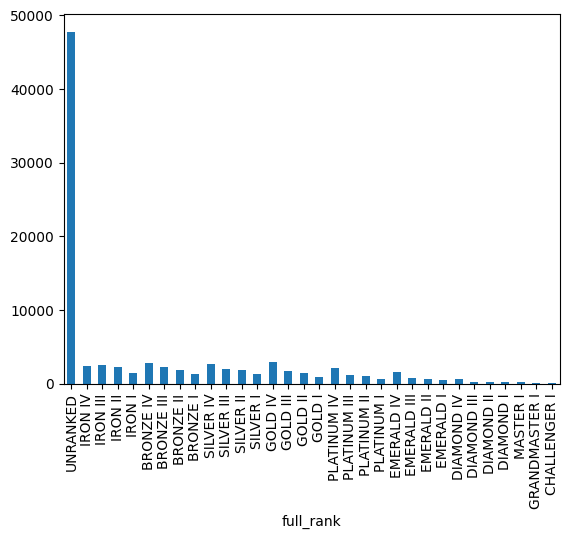

In [123]:
swiftplay_player_match_data.groupby("puuid")["full_rank"].first().value_counts().reindex(rank_order).plot(kind='bar')

<Axes: xlabel='full_rank'>

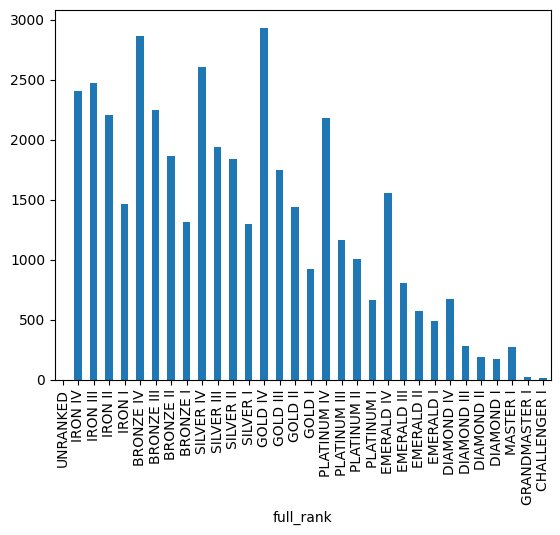

In [124]:
swiftplay_player_match_data.groupby("puuid")["full_rank"].first().value_counts().drop("UNRANKED").reindex(rank_order).plot(kind='bar')

### Ranked Distribution

<Axes: xlabel='full_rank'>

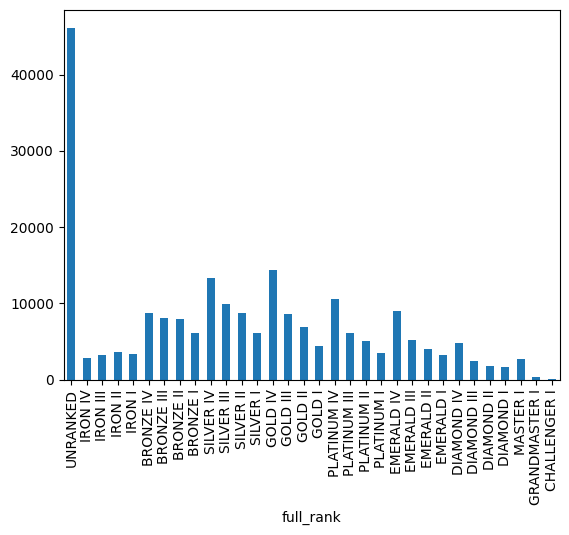

In [125]:
ranked_player_match_data.groupby("puuid")["full_rank"].first().value_counts().reindex(rank_order).plot(kind='bar')

<Axes: xlabel='full_rank'>

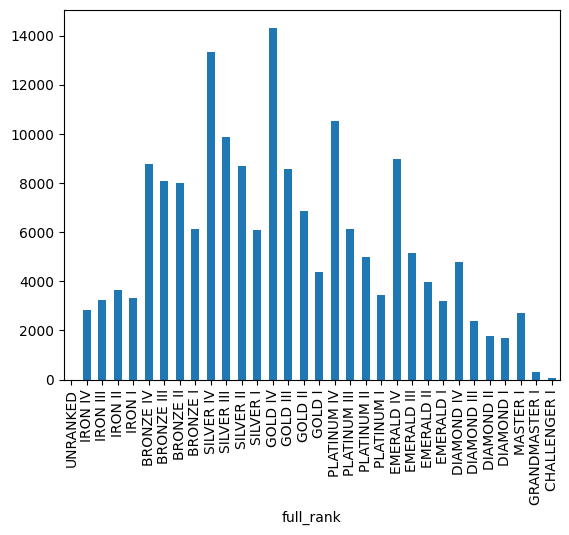

In [126]:
ranked_player_match_data.groupby("puuid")["full_rank"].first().value_counts().drop("UNRANKED").reindex(rank_order).plot(kind='bar')

## Swiftplay: Winning vs. Losing Teams

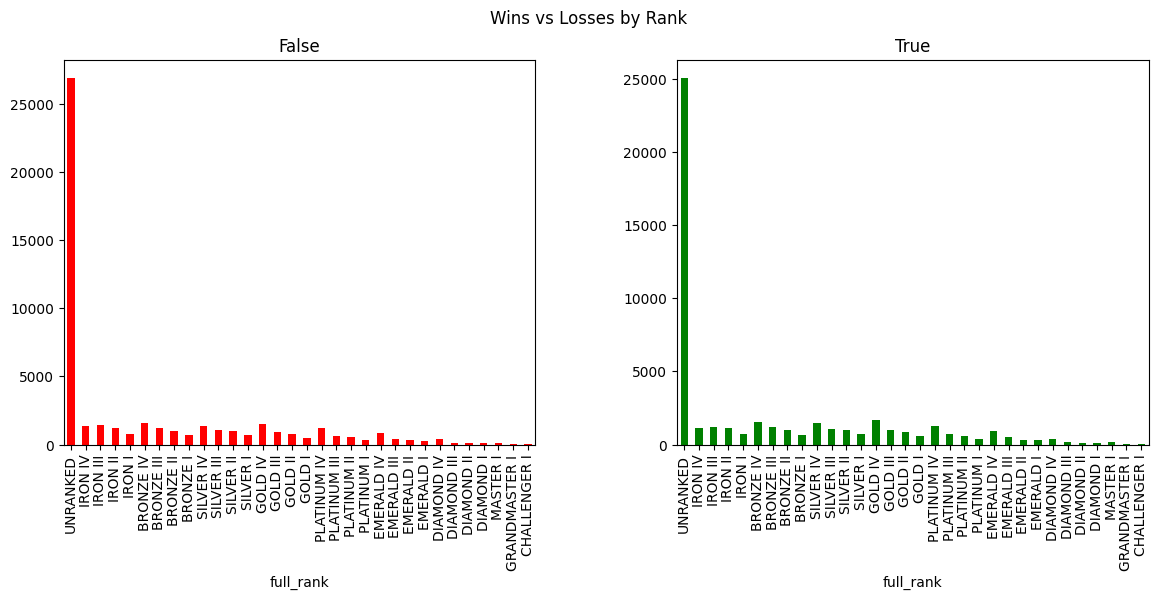

In [127]:
# Group by puuid and get each player's first recorded rank
player_ranks = swiftplay_player_match_data.groupby(["puuid", "win"])["full_rank"].first().reset_index()

# Count occurrences of each rank for win=0 and win=1
rank_counts = player_ranks.groupby("win")["full_rank"].value_counts().unstack(fill_value=0)  # Convert to DataFrame

# Reorder columns based on rank_order
rank_counts = rank_counts.reindex(columns=rank_order, fill_value=0)

rank_counts.T.plot(kind="bar", subplots=True, layout=(1, 2), figsize=(14, 5), legend=False, color=["red", "green"])

# Customize the plots
plt.suptitle("Wins vs Losses by Rank")
plt.subplots_adjust(wspace=0.3)  # Adjust space between subplots
plt.show()

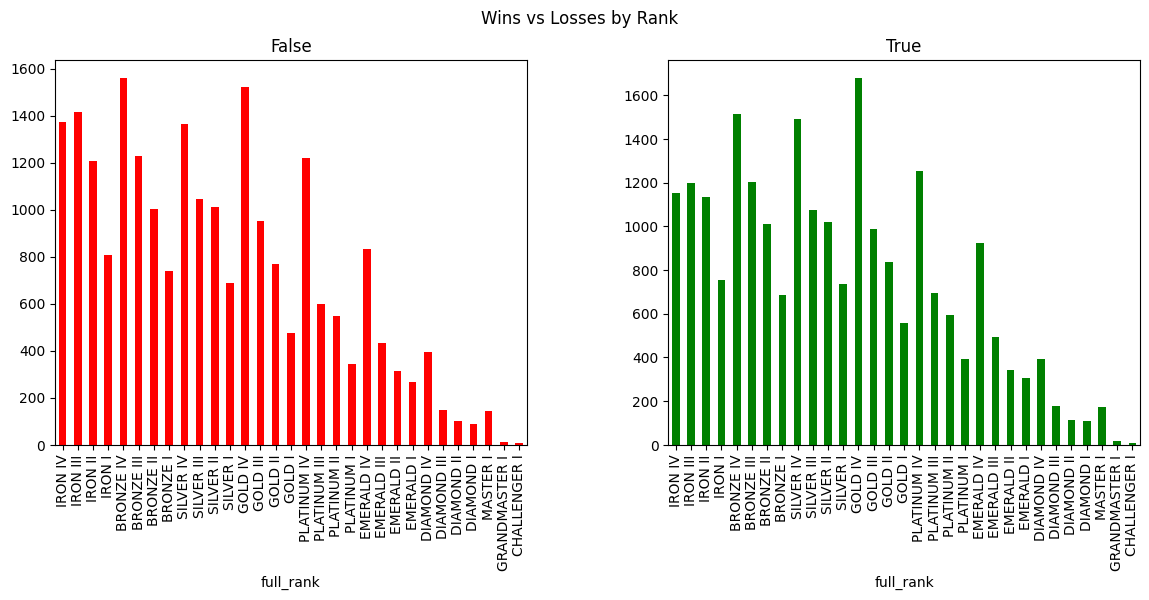

In [128]:
rank_counts.T.drop("UNRANKED").plot(kind="bar", subplots=True, layout=(1, 2), figsize=(14, 5), legend=False, color=["red", "green"])

plt.suptitle("Wins vs Losses by Rank")
plt.subplots_adjust(wspace=0.3)
plt.show()

# Summoner Level

## Swifplay vs. Ranked

### Swiftplay Distribution

<Axes: ylabel='Frequency'>

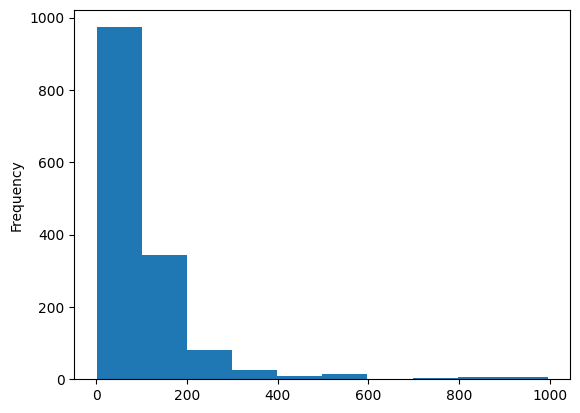

In [129]:
swiftplay_player_match_data["summonerLevel"].value_counts().plot(kind='hist')

### Ranked Distribution

<Axes: ylabel='Frequency'>

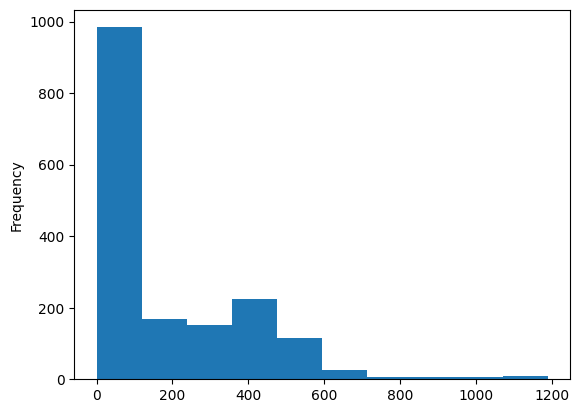

In [130]:
ranked_player_match_data["summonerLevel"].value_counts().plot(kind='hist')

## Swiftplay: Winning vs. Losing Teams

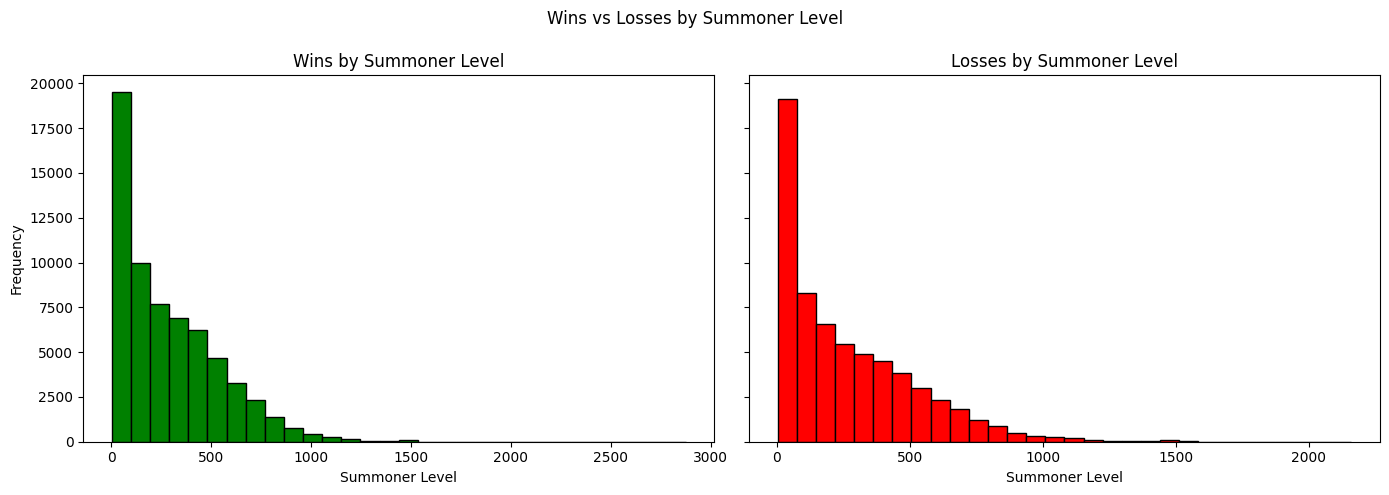

In [131]:
player_levels = swiftplay_player_match_data[['summonerLevel', 'win']]

# Plot histograms for summonerLevel, separate by win and loss
fig, ax = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Plot for wins (win = 1)
player_levels[player_levels['win'] == 1]['summonerLevel'].plot(kind='hist', bins=30, ax=ax[0], color='green', edgecolor='black')
ax[0].set_title("Wins by Summoner Level")
ax[0].set_xlabel("Summoner Level")
ax[0].set_ylabel("Frequency")

# Plot for losses (win = 0)
player_levels[player_levels['win'] == 0]['summonerLevel'].plot(kind='hist', bins=30, ax=ax[1], color='red', edgecolor='black')
ax[1].set_title("Losses by Summoner Level")
ax[1].set_xlabel("Summoner Level")
ax[1].set_ylabel("Frequency")

# Overall title
plt.suptitle("Wins vs Losses by Summoner Level")

# Show plot
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Adjust space for the suptitle
plt.show()

# Champion Mastery

## Swiftplay vs. Ranked

### Swiftplay Distribution

<Axes: ylabel='Frequency'>

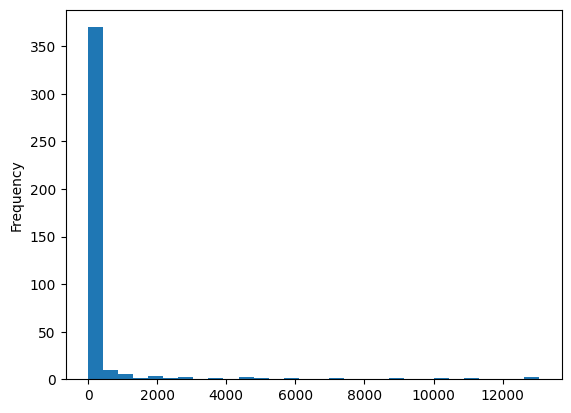

In [132]:
swiftplay_player_match_data["championLevel"].value_counts().plot(kind='hist', bins=30)

### Ranked Distribution

<Axes: ylabel='Frequency'>

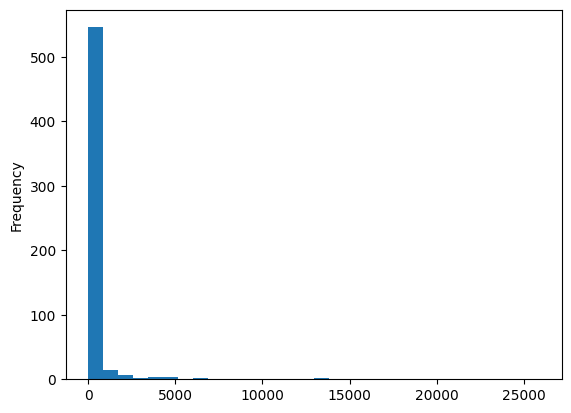

In [133]:
ranked_player_match_data["championLevel"].value_counts().plot(kind='hist', bins=30)

## Swiftplay: Winning vs. Losing Teams

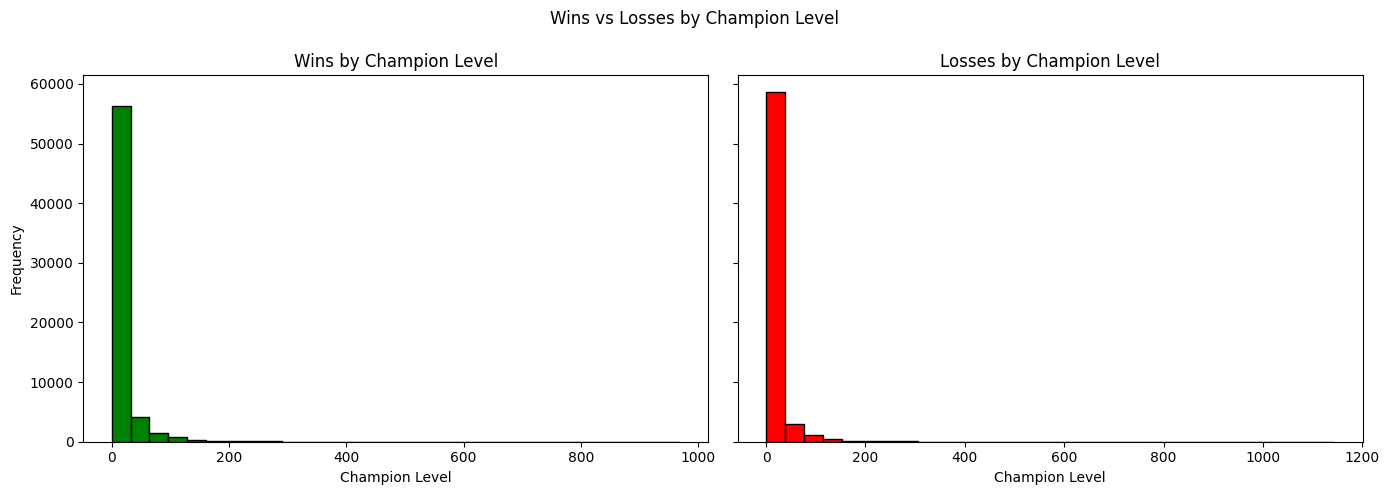

In [134]:
player_levels = swiftplay_player_match_data[['championLevel', 'win']]

# Plot histograms for championLevel, separate by win and loss
fig, ax = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Plot for wins (win = 1)
player_levels[player_levels['win'] == 1]['championLevel'].plot(kind='hist', bins=30, ax=ax[0], color='green', edgecolor='black')
ax[0].set_title("Wins by Champion Level")
ax[0].set_xlabel("Champion Level")
ax[0].set_ylabel("Frequency")

# Plot for losses (win = 0)
player_levels[player_levels['win'] == 0]['championLevel'].plot(kind='hist', bins=30, ax=ax[1], color='red', edgecolor='black')
ax[1].set_title("Losses by Champion Level")
ax[1].set_xlabel("Champion Level")
ax[1].set_ylabel("Frequency")

# Overall title
plt.suptitle("Wins vs Losses by Champion Level")

# Show plot
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Adjust space for the suptitle
plt.show()

# K/D

## Swiftplay vs. Ranked

### Swiftplay Distribution

<Axes: ylabel='Frequency'>

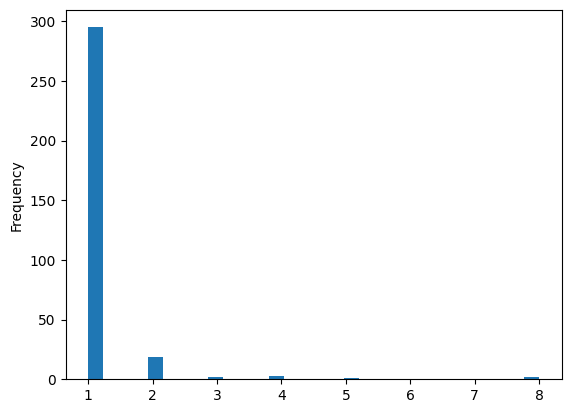

In [135]:
players["swiftplay_kd"].value_counts().plot(kind='hist', bins=30)

### Ranked Distribution

<Axes: ylabel='Frequency'>

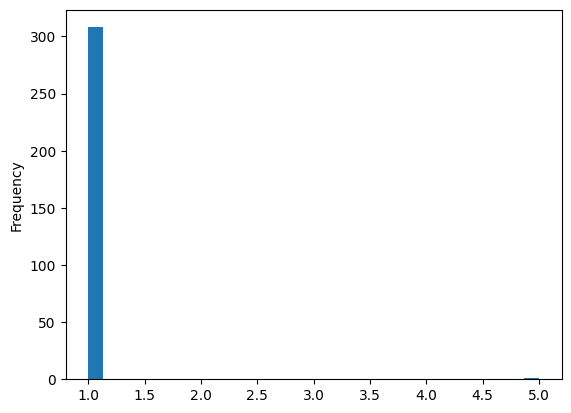

In [136]:
players["ranked_kd"].value_counts().plot(kind='hist', bins=30)

## Swiftplay: Winning vs. Losing Teams

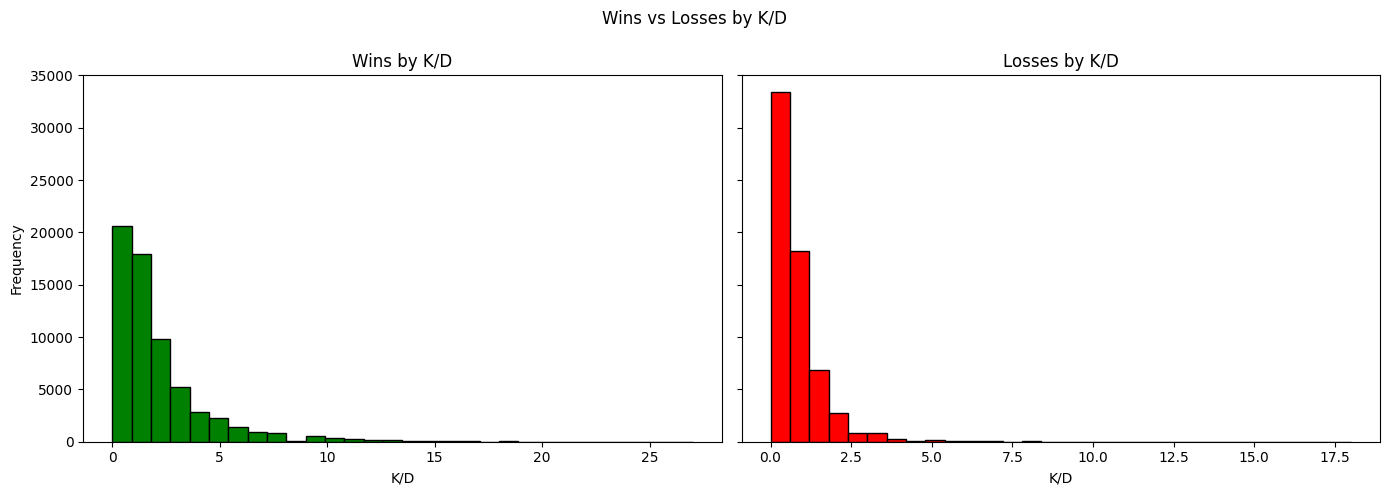

In [137]:
player_levels = swiftplay_player_match_data[['kills', 'deaths', 'win']].copy()
player_levels["kd"] = player_levels["kills"] / player_levels["deaths"].replace(0, 1)

# Plot histograms for championLevel, separate by win and loss
fig, ax = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Plot for wins (win = 1)
player_levels[player_levels['win'] == 1]['kd'].plot(kind='hist', bins=30, ax=ax[0], color='green', edgecolor='black')
ax[0].set_title("Wins by K/D")
ax[0].set_xlabel("K/D")
ax[0].set_ylabel("Frequency")

# Plot for losses (win = 0)
player_levels[player_levels['win'] == 0]['kd'].plot(kind='hist', bins=30, ax=ax[1], color='red', edgecolor='black')
ax[1].set_title("Losses by K/D")
ax[1].set_xlabel("K/D")
ax[1].set_ylabel("Frequency")

# Overall title
plt.suptitle("Wins vs Losses by K/D")

# Show plot
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Adjust space for the suptitle
plt.show()

# A/D

## Swiftplay vs. Ranked

### Swiftplay Distribution

<Axes: ylabel='Frequency'>

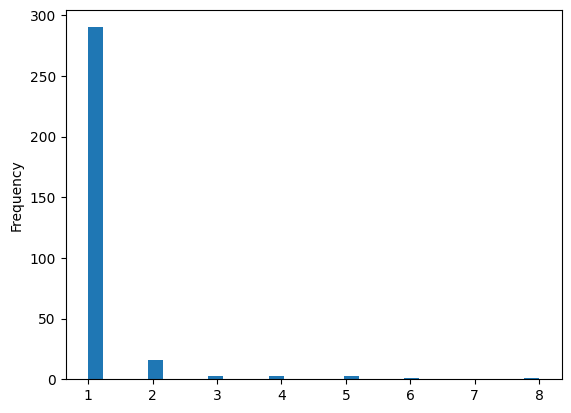

In [138]:
players["swiftplay_ad"].value_counts().plot(kind='hist', bins=30)

### Ranked Distribution

<Axes: ylabel='Frequency'>

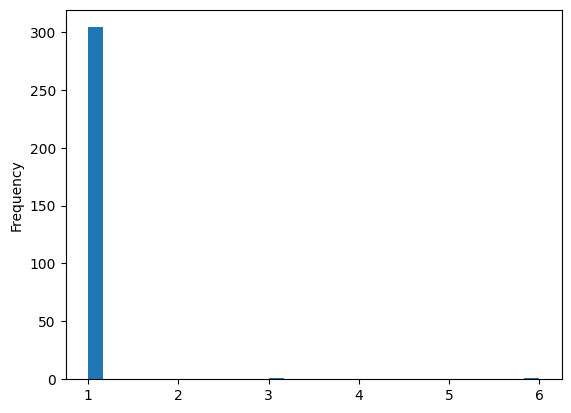

In [139]:
players["ranked_ad"].value_counts().plot(kind='hist', bins=30)

## Swiftplay: Winning vs. Losing Teams

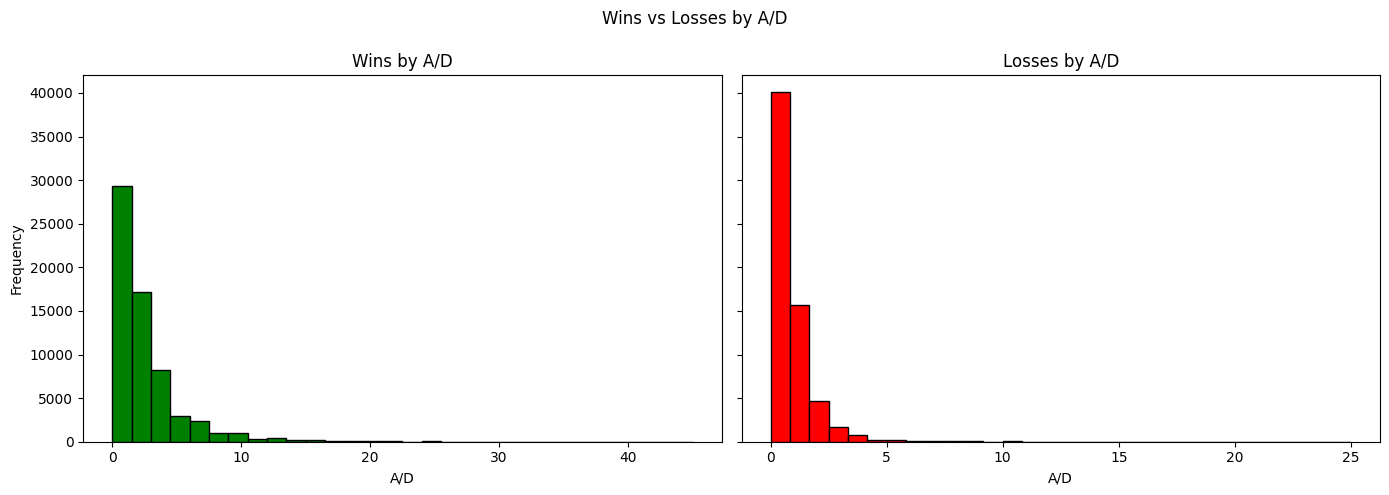

In [140]:
player_levels = swiftplay_player_match_data[['assists', 'deaths', 'win']].copy()
player_levels["ad"] = player_levels["assists"] / player_levels["deaths"].replace(0, 1)

# Plot histograms for championLevel, separate by win and loss
fig, ax = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Plot for wins (win = 1)
player_levels[player_levels['win'] == 1]['ad'].plot(kind='hist', bins=30, ax=ax[0], color='green', edgecolor='black')
ax[0].set_title("Wins by A/D")
ax[0].set_xlabel("A/D")
ax[0].set_ylabel("Frequency")

# Plot for losses (win = 0)
player_levels[player_levels['win'] == 0]['ad'].plot(kind='hist', bins=30, ax=ax[1], color='red', edgecolor='black')
ax[1].set_title("Losses by A/D")
ax[1].set_xlabel("A/D")
ax[1].set_ylabel("Frequency")

# Overall title
plt.suptitle("Wins vs Losses by A/D")

# Show plot
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Adjust space for the suptitle
plt.show()

# Hypothesis Testing

## Rank

### Swiftplay vs. Ranked

In [141]:
swiftplay_ranks = swiftplay_player_match_data.groupby("puuid")["full_rank"].first().cat.codes
ranked_ranks = ranked_player_match_data.groupby("puuid")["full_rank"].first().cat.codes

print(f"Swiftplay mean Rank: {swiftplay_ranks.mean():.2f}")
print(f"Ranked mean Rank: {ranked_ranks.mean():.2f}")

t_stat_1, p_value_1 = stats.ttest_ind(swiftplay_ranks, ranked_ranks, equal_var=False)  # Welch's t-test
print(f"Swiftplay vs. Ranked Full Rank: t={t_stat_1:.3f}, p={p_value_1:.3f}")

Swiftplay mean Rank: 5.12
Ranked mean Rank: 10.73
Swiftplay vs. Ranked Full Rank: t=-188.244, p=0.000


### Swiftplay: Winning vs. Losing Teams

In [142]:
winning_ranks = swiftplay_player_match_data[swiftplay_player_match_data["win"] == 1].groupby("puuid")["full_rank"].first().cat.codes
losing_ranks = swiftplay_player_match_data[swiftplay_player_match_data["win"] == 0].groupby("puuid")["full_rank"].first().cat.codes

print(f"Swiftplay winning team mean Rank: {winning_ranks.mean():.2f}")
print(f"Swiftplay losing team mean Rank: {losing_ranks.mean():.2f}")

t_stat_2, p_value_2 = stats.ttest_ind(winning_ranks, losing_ranks, equal_var=False)  # Welch's t-test
print(f"Winning vs. Losing Full Rank: t={t_stat_2:.3f}, p={p_value_2:.3f}")

Swiftplay winning team mean Rank: 5.47
Swiftplay losing team mean Rank: 4.98
Winning vs. Losing Full Rank: t=10.562, p=0.000


## Summoner Level

### Swiftplay vs. Ranked

In [143]:
swiftplay_levels = swiftplay_player_match_data['summonerLevel']
ranked_levels = ranked_player_match_data['summonerLevel']

print(f"Swiftplay mean Summoner Level: {swiftplay_levels.mean():.2f}")
print(f"Ranked mean Summoner Level: {ranked_levels.mean():.2f}")

t_stat_1, p_value_1 = stats.ttest_ind(swiftplay_levels, ranked_levels, equal_var=False)  # Welch's t-test
print(f"Swiftplay vs. Ranked Summoner Level: t={t_stat_1:.3f}, p={p_value_1:.3f}")

Swiftplay mean Summoner Level: 277.41
Ranked mean Summoner Level: 350.72
Swiftplay vs. Ranked Summoner Level: t=-86.165, p=0.000


### Swiftplay: Winning vs. Losing Teams

In [144]:
winning_levels = swiftplay_player_match_data[swiftplay_player_match_data['win'] == 1]['summonerLevel']
losing_levels = swiftplay_player_match_data[swiftplay_player_match_data['win'] == 0]['summonerLevel']

print(f"Swiftplay winning team mean Summoner Level: {winning_levels.mean():.2f}")
print(f"Swiftplay losing team mean Summoner Level: {losing_levels.mean():.2f}")

t_stat_2, p_value_2 = stats.ttest_ind(winning_levels, losing_levels, equal_var=False)  # Welch's t-test
print(f"Winning vs. Losing Summoner Level: t={t_stat_2:.3f}, p={p_value_2:.3f}")

Swiftplay winning team mean Summoner Level: 287.89
Swiftplay losing team mean Summoner Level: 266.93
Winning vs. Losing Summoner Level: t=14.772, p=0.000


## Champion Mastery

### Swiftplay vs. Ranked

In [145]:
swiftplay_levels = swiftplay_player_match_data['championLevel']
ranked_levels = ranked_player_match_data['championLevel']

print(f"Swiftplay mean Champion Level: {swiftplay_levels.mean():.2f}")
print(f"Ranked mean Champion Level: {ranked_levels.mean():.2f}")

t_stat_1, p_value_1 = stats.ttest_ind(swiftplay_levels, ranked_levels, equal_var=False)  # Welch's t-test
print(f"Swiftplay vs. Ranked Champion Level: t={t_stat_1:.3f}, p={p_value_1:.3f}")

Swiftplay mean Champion Level: 15.95
Ranked mean Champion Level: 21.58
Swiftplay vs. Ranked Champion Level: t=-48.503, p=0.000


### Swiftplay: Winning vs. Losing Team

In [146]:
winning_levels = swiftplay_player_match_data[swiftplay_player_match_data['win'] == 1]['championLevel']
losing_levels = swiftplay_player_match_data[swiftplay_player_match_data['win'] == 0]['championLevel']

print(f"Swiftplay winning team mean Champion Level: {winning_levels.mean():.2f}")
print(f"Swiftplay losing team mean Champion Level: {losing_levels.mean():.2f}")

t_stat_2, p_value_2 = stats.ttest_ind(winning_levels, losing_levels, equal_var=False)  # Welch's t-test
print(f"Winning vs. Losing Champion Level: t={t_stat_2:.3f}, p={p_value_2:.3f}")

Swiftplay winning team mean Champion Level: 16.98
Swiftplay losing team mean Champion Level: 14.92
Winning vs. Losing Champion Level: t=11.529, p=0.000


## K/D

### Swiftplay vs. Ranked

In [147]:
swiftplay_kd = players['swiftplay_kd'].dropna()
ranked_kd = players['ranked_kd'].dropna()

print(f"Swiftplay mean K/D: {swiftplay_kd.mean():.2f}")
print(f"Ranked mean K/D: {ranked_kd.mean():.2f}")

t_stat_1, p_value_1 = stats.ttest_ind(swiftplay_kd, ranked_kd, equal_var=False)  # Welch's t-test
print(f"Swiftplay vs. Ranked K/D: t={t_stat_1:.3f}, p={p_value_1:.3f}")

Swiftplay mean K/D: 1.30
Ranked mean K/D: 1.00
Swiftplay vs. Ranked K/D: t=4.564, p=0.000


### Swiftplay: Winning vs. Losing Team

In [148]:
player_levels = swiftplay_player_match_data[['kills', 'deaths', 'win']].copy()
player_levels["kd"] = player_levels["kills"] / player_levels["deaths"].replace(0, 1)

winning_kd = player_levels[player_levels['win'] == 1]['kd']
losing_kd = player_levels[player_levels['win'] == 0]['kd']

print(f"Swiftplay winning team mean K/D: {winning_kd.mean():.2f}")
print(f"Swiftplay losing team mean K/D: {losing_kd.mean():.2f}")

t_stat_2, p_value_2 = stats.ttest_ind(winning_kd, losing_kd, equal_var=False)  # Welch's t-test
print(f"Winning vs. Losing K/D: t={t_stat_2:.3f}, p={p_value_2:.3f}")

Swiftplay winning team mean K/D: 2.09
Swiftplay losing team mean K/D: 0.75
Winning vs. Losing K/D: t=136.369, p=0.000


## K/A

### Swiftplay vs. Ranked

In [149]:
swiftplay_ad = players['swiftplay_ad'].dropna()
ranked_ad = players['ranked_ad'].dropna()

print(f"Swiftplay mean A/D: {swiftplay_ad.mean():.2f}")
print(f"Ranked mean A/D: {ranked_ad.mean():.2f}")

t_stat_1, p_value_1 = stats.ttest_ind(swiftplay_ad, ranked_ad, equal_var=False)  # Welch's t-test
print(f"Swiftplay vs. Ranked A/D: t={t_stat_1:.3f}, p={p_value_1:.3f}")

Swiftplay mean A/D: 1.34
Ranked mean A/D: 1.36
Swiftplay vs. Ranked A/D: t=-0.239, p=0.811


### Swiftplay: Winning vs. Losing Team

In [150]:
player_levels = swiftplay_player_match_data[['assists', 'deaths', 'win']].copy()
player_levels["ad"] = player_levels["assists"] / player_levels["deaths"].replace(0, 1)

winning_ad = player_levels[player_levels['win'] == 1]['ad']
losing_ad = player_levels[player_levels['win'] == 0]['ad']

print(f"Swiftplay winning team mean A/D: {winning_ad.mean():.2f}")
print(f"Swiftplay losing team mean A/D: {losing_ad.mean():.2f}")

t_stat_2, p_value_2 = stats.ttest_ind(winning_ad, losing_ad, equal_var=False)  # Welch's t-test
print(f"Winning vs. Losing A/D: t={t_stat_2:.3f}, p={p_value_2:.3f}")

Swiftplay winning team mean A/D: 2.43
Swiftplay losing team mean A/D: 0.85
Winning vs. Losing A/D: t=133.838, p=0.000
